# Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


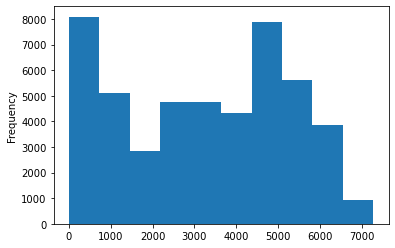

In [5]:
traffic.traffic_volume.plot.hist()
plt.show()

## Traffic volume day vs night

In [6]:
traffic.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

* About 25% of the time, 1193 or fewer cars passed by each hour. This may be because of low traffic during the night or during road construction.

In [7]:
traffic.date_time = pd.to_datetime(traffic.date_time)
traffic.loc[:,['dayofweek']] = traffic.date_time.dt.dayofweek
traffic.loc[:,['month']] = traffic.date_time.dt.month
traffic.loc[:,['hour']] = traffic.date_time.dt.hour
night = (traffic.date_time.dt.hour < 7) | (traffic.date_time.dt.hour >= 19)
night_data = traffic[night]
day = (traffic.date_time.dt.hour >= 7) & (traffic.date_time.dt.hour <= 18)
day_data = traffic[day]
sorted(day_data.date_time.dt.hour.unique())

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

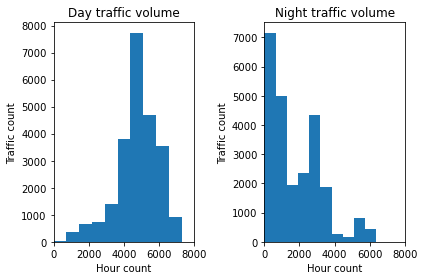

In [8]:
fig,a =  plt.subplots(1,2)
x = np.arange(1,5)
a[0].hist(day_data.traffic_volume)
a[0].set_title('Day traffic volume')
a[0].set_xlim([0, 8000])
a[0].set_xlabel('Hour count')
a[0].set_ylabel('Traffic count')
a[1].hist(night_data.traffic_volume)
a[1].set_title('Night traffic volume')
a[1].set_xlim([0, 8000])
a[1].set_xlabel('Hour count')
a[1].set_ylabel('Traffic count')
plt.tight_layout()
plt.show()

In [9]:
day_data.traffic_volume.describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night_data.traffic_volume.describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

* The day_data histogram is slightly left skewed with mostly symmetrical form. Left skew is because of the morning traffic most likely caused by an office hour rush. Symmetrical form around the mean shows that the traffic volume is spread almost uniformly during the daytime. The traffic is lower in the morning, peaks around mid-day and 

* The night_data histogram is rightly skewed.

* Since our goal is to find the heavy traffic indicators, we will focus on 

In [11]:
by_month = day_data.groupby('month').mean()
by_month.traffic_volume
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,month,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,10,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,10,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,10,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,9,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,9,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,9,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,9,22


# Average day traffic by month

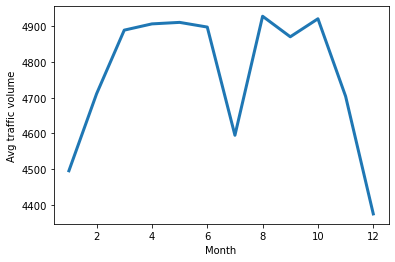

In [22]:
plt.plot(by_month.traffic_volume.index, by_month.traffic_volume.values, linewidth = 3)
plt.xlabel('Month')
plt.ylabel('Avg traffic volume')
plt.show()

* Around January beginning and December end (holidays), the average traffic volume is lowest. In July there is a dip due to Summer holidays.

## Traffic volume for day of the week

In [13]:
# 0 is Monday and 6 is Sunday
by_dayofweek = day_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

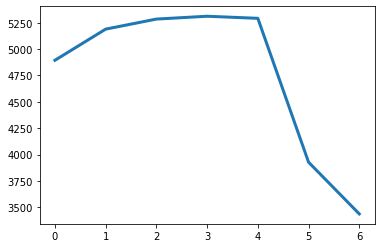

In [21]:
plt.plot(by_dayofweek['traffic_volume'], linewidth = 3)

In [15]:
mean_traffic_vol_weekdays = by_dayofweek['traffic_volume'][0:5].mean()
mean_traffic_vol_weekend = by_dayofweek['traffic_volume'][5:7].mean()
percentage_weekend_weekday = (mean_traffic_vol_weekend/mean_traffic_vol_weekdays)*100 
print(100 - percentage_weekend_weekday)

29.112288456143645


* Sunday has the least average traffic volume
* The average traffic volume of weekends decreases by about 27% compared to that of the weekdays.  
* We will now consider the time of the day for the weekdays and weekends

# Day traffic by hour

In [16]:
# 4 is Friday
business_days = day_data.copy()[day_data.dayofweek<=4]
weekend = day_data.copy()[day_data.dayofweek>=5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


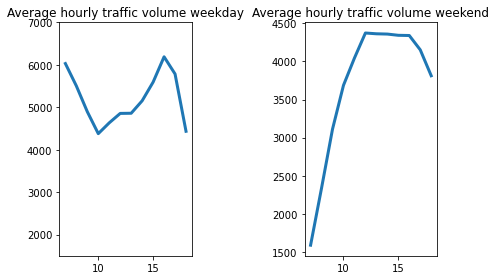

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].plot(by_hour_business.index, by_hour_business.traffic_volume, linewidth = 3)
ax[0].set_title('Average hourly traffic volume weekday')
ax[1].plot(by_hour_weekend.index, by_hour_weekend.traffic_volume, linewidth = 3)
ax[1].set_title('Average hourly traffic volume weekend')
ax[0].set_ylim([1500,7000])
ax[0].set_ylim([1500,7000])
plt.tight_layout(w_pad=8)
plt.show()

* 7 a.m. and 16 p.m. are the rush hours on business days
* Weekends gets busier after 11 a.m. in the morning.

## Correlation between traffic volume and weather

In [36]:
traffic.corr()[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.130299,1.000000,0.009069,-0.019755,-0.101976
rain_1h,0.004714,0.009069,1.000000,-0.000090,0.004818
snow_1h,0.000733,-0.019755,-0.000090,1.000000,0.027931
clouds_all,0.067054,-0.101976,0.004818,0.027931,1.000000
traffic_volume,1.000000,0.130299,0.004714,0.000733,0.067054
dayofweek,-0.149544,-0.007708,-0.006920,-0.014928,-0.039715
month,-0.002533,0.223738,0.001298,0.020412,-0.009133
hour,0.352401,0.112089,0.003421,0.009849,0.054418


* Temperature among weather conditions, has the highest correlation with the traffic volume.

(230.0, 320.0)

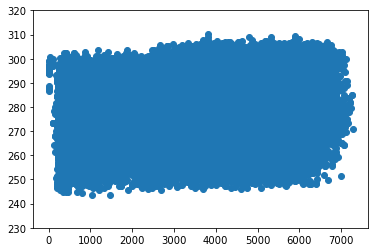

In [38]:
plt.scatter(traffic['traffic_volume'], traffic['temp'])
plt.ylim([230,320])

* No weather condition is a reliable indicator of traffic volume.

In [54]:
by_weather_main = day_data.groupby('weather_main').mean()
by_weather_description = day_data.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

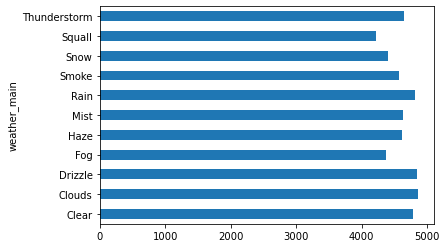

In [62]:
by_weather_main['traffic_volume'].plot.barh()

* There is no traffic volume exceeding 5000 cars for any weather type.

<AxesSubplot:ylabel='weather_description'>

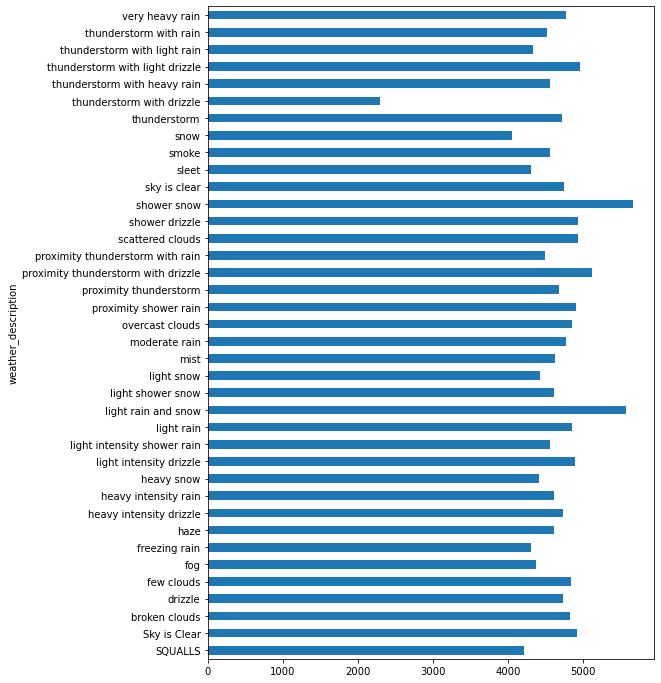

In [68]:
by_weather_description['traffic_volume'].plot.barh(figsize = (8,12))

* For 'shower snow' and 'light rain and snow', the traffic volume exceeds 5000 cars.
* 'Thrunderstrom with drizzle' is worst weather condition with respect to traffic volume.

## Conlclusion

* January beginning and December end (holidays), summer holidays also affected the traffic.
* Weekdays are naturally more busy than the weekends.
* 7 a.m. and 16 p.m. are the rush hours on business days. Weekends gets busier after 11 a.m. in the morning.
* None of the weather conditions is reliably correlated with the traffic volume.
* 'Thrunderstrom with drizzle' is worst weather condition with respect to traffic volume.